In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d nodoubttome/skin-cancer9-classesisic

 99% 778M/786M [00:08<00:00, 54.7MB/s]
100% 786M/786M [00:09<00:00, 88.8MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/skin-cancer9-classesisic.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [3]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(128,128)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(128,128)
)

Found 2239 files belonging to 9 classes.
Found 118 files belonging to 9 classes.


In [4]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

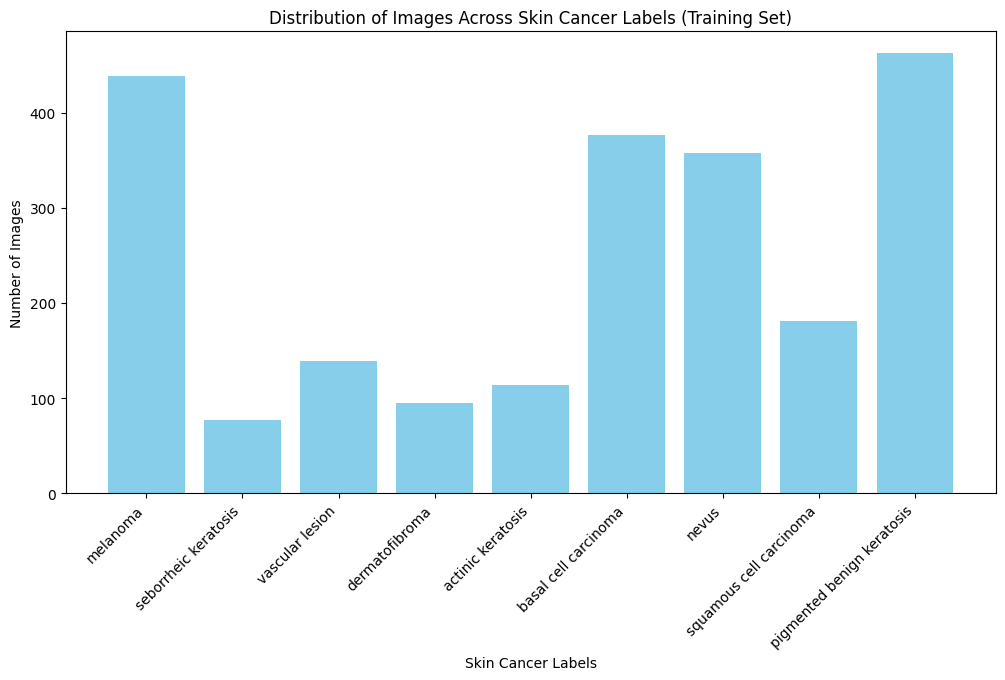

In [5]:
import os
import matplotlib.pyplot as plt

train_dir = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train'

# Function to count the number of images in each label
def count_images_per_label(directory):
    label_counts = {}
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            count = len(os.listdir(label_path))
            label_counts[label] = count
    return label_counts

# Get the counts for the training directory
train_label_counts = count_images_per_label(train_dir)

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(train_label_counts.keys(), train_label_counts.values(), color='skyblue')
plt.xlabel('Skin Cancer Labels')
plt.ylabel('Number of Images')
plt.title('Distribution of Images Across Skin Cancer Labels (Training Set)')
plt.xticks(rotation=45, ha='right')
plt.show()


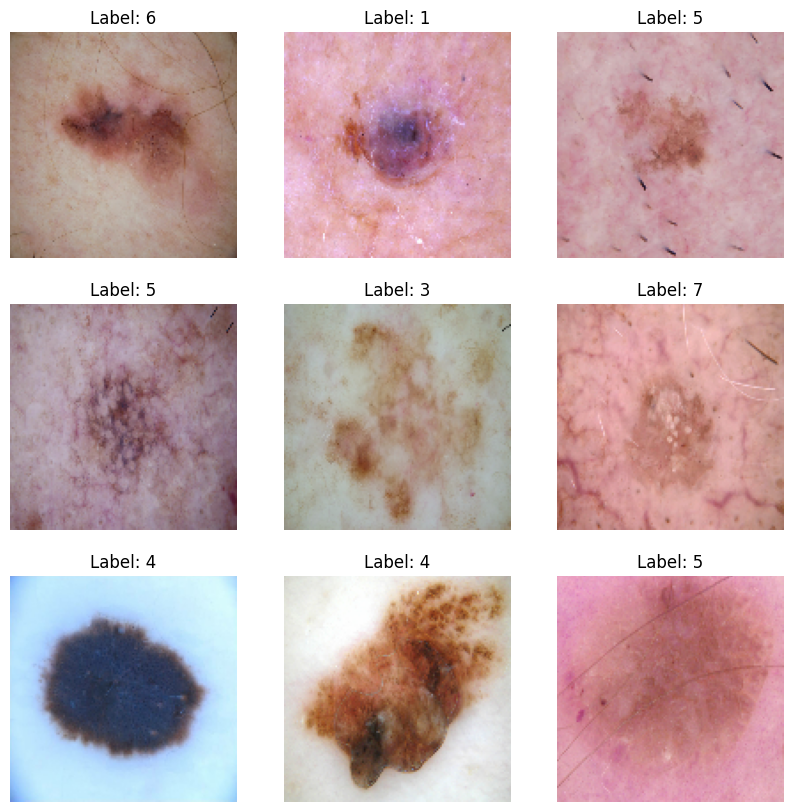

In [6]:
import matplotlib.pyplot as plt
# Get a batch of images from the training dataset
for images, labels in train_ds.take(1):
    # Rescale the images for display
    images_for_display = images.numpy() * 255.0

    # Display the images
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Change this number based on how many images you want to display
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images_for_display[i].astype("uint8"))
        plt.title(f'Label: {labels[i].numpy()}')
        plt.axis("off")

plt.show()


In [ ]:
from keras import layers, models
from keras.layers import BatchNormalization,Dropout
num_classes = 9
img_height, img_width = 128,128
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3))
])

model.add(Conv2D(32, 3, padding="same", activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding="same", activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, 3, padding="same", activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.15))

model.add(Conv2D(256, 3, padding="same", activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.20))

model.add(Conv2D(512, 3, padding="same", activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(units=num_classes, activation='softmax'))

In [8]:
# create CNN model
from keras import layers, models
from keras.layers import BatchNormalization,Dropout
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(9,activation='softmax'))

In [9]:
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

epochs = 25
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=epochs
)

Epoch 1/25
70/70 [==============================] - 34s 364ms/step - loss: 3.0879 - accuracy: 0.3019 - val_loss: 8.5094 - val_accuracy: 0.0254
Epoch 2/25
70/70 [==============================] - 19s 253ms/step - loss: 2.0773 - accuracy: 0.3613 - val_loss: 5.8769 - val_accuracy: 0.0508
Epoch 3/25
70/70 [==============================] - 20s 269ms/step - loss: 1.7058 - accuracy: 0.4247 - val_loss: 6.7791 - val_accuracy: 0.1356
Epoch 4/25
70/70 [==============================] - 19s 257ms/step - loss: 1.6164 - accuracy: 0.4417 - val_loss: 2.8482 - val_accuracy: 0.1186
Epoch 5/25
70/70 [==============================] - 19s 255ms/step - loss: 1.4828 - accuracy: 0.5011 - val_loss: 3.4789 - val_accuracy: 0.1864
Epoch 6/25
70/70 [==============================] - 20s 262ms/step - loss: 1.3376 - accuracy: 0.5351 - val_loss: 3.5908 - val_accuracy: 0.1610
Epoch 7/25
70/70 [==============================] - 18s 234ms/step - loss: 1.2721 - accuracy: 0.5449 - val_loss: 2.6217 - val_accuracy: 0.3305

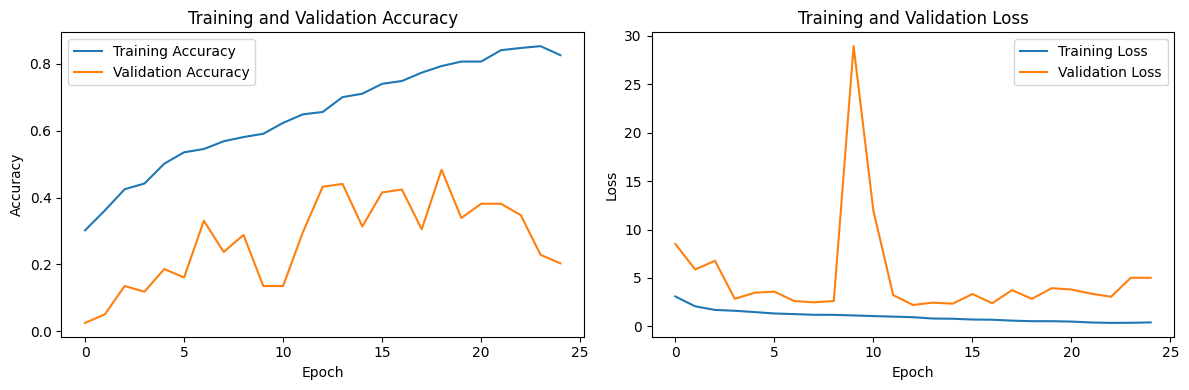

In [10]:
plt.figure(figsize=(12, 4))

# Plotting train vs validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plotting train vs validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

In [11]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [12]:
batch_size = 16

# Define the paths to your train and validation directories
train_dir = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
validation_dir = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test'

# Augmentation configuration for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# Rescaling for validation data
test_datagen = ImageDataGenerator(rescale=1./255)

# Creating a generator for training data
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Path to the training directory
    target_size=(128, 128),  # All images will be resized to 256x256
    batch_size=batch_size,
    class_mode='categorical')  # Assuming you have multiple classes, so using categorical labels

# Creating a generator for validation data
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical')

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [13]:
from keras.layers import BatchNormalization,Dropout

In [14]:
pip install -U keras-tuner

In [15]:
import kerastuner as kt

<ipython-input-15-5fd8096cdee5>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [16]:
train_dir = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train'

number_of_classes = 9

def build_model(hp):
    model = keras.Sequential()

    model.add(Conv2D(hp.Int('conv1_units', min_value=32, max_value=128, step=32), (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(hp.Int('conv2_units', min_value=64, max_value=256, step=32), (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())

    model.add(Dense(hp.Int('dense1_units', min_value=128, max_value=512, step=64), activation='relu'))
    model.add(Dropout(hp.Float('dropout1', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(hp.Int('dense2_units', min_value=64, max_value=256, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout2', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(number_of_classes, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create a tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # You can increase this for a more thorough search
    directory='tuner_logs',
    project_name='skin_cancer_tuning'
)

# Search for the best hyperparameter configuration
tuner.search(train_generator, epochs=10, validation_data=validation_generator)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
best_model.fit(train_generator, epochs=20, validation_data=validation_generator)


Trial 5 Complete [00h 06m 21s]
val_accuracy: 0.31355932354927063

Best val_accuracy So Far: 0.33898305892944336
Total elapsed time: 00h 35m 42s
Epoch 1/20
140/140 [==============================] - 39s 261ms/step - loss: 2.1589 - accuracy: 0.2072 - val_loss: 2.2047 - val_accuracy: 0.2203
Epoch 2/20
140/140 [==============================] - 36s 256ms/step - loss: 1.9507 - accuracy: 0.2649 - val_loss: 2.3743 - val_accuracy: 0.2627
Epoch 3/20
140/140 [==============================] - 40s 288ms/step - loss: 1.8626 - accuracy: 0.3064 - val_loss: 2.2202 - val_accuracy: 0.3136
Epoch 4/20
140/140 [==============================] - 35s 248ms/step - loss: 1.7311 - accuracy: 0.3573 - val_loss: 2.1405 - val_accuracy: 0.2966
Epoch 5/20
140/140 [==============================] - 36s 257ms/step - loss: 1.6926 - accuracy: 0.3912 - val_loss: 2.2273 - val_accuracy: 0.2797
Epoch 6/20
140/140 [==============================] - 35s 249ms/step - loss: 1.6012 - accuracy: 0.4167 - val_loss: 2.2673 - val_acc

**After using hyperparameter tuning and Data augmentation the difference between accuracy and val_accuracy has lowered down . BUt due to high imbalance in different labels of data image there is huge scope of improvement in accuracy part to be done.**

In [17]:
!pip install Augmentor

In [18]:
import Augmentor
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator

In [31]:
import Augmentor
import os

path_to_training_dataset = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
output_directory_colab = '/content/augments_dataset/'

class_names = [class_name for class_name in os.listdir(path_to_training_dataset) if os.path.isdir(os.path.join(path_to_training_dataset, class_name))]

for class_name in class_names:
    class_path = os.path.join(path_to_training_dataset, class_name)

    # Instead of using 'output/', specify class_name directly as the output directory
    output_directory = os.path.join(output_directory_colab, class_name)

    # Create Augmentor pipeline for data augmentation
    p = Augmentor.Pipeline(class_path, output_directory=output_directory)

    # Define augmentation operations
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    # p.flip_left_right(probability=0.5)
    # p.zoom_random(probability=0.5, percentage_area=0.8)
    # p.flip_top_bottom(probability=0.5)

    num_augmented_images = 1000

    p.sample(num_augmented_images)


Initialised with 438 image(s) found.
Output directory set to /content/augments_dataset/melanoma.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7C85148D8670>: 100%|██████████| 1000/1000 [02:56<00:00,  5.67 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/augments_dataset/seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7C850C4818A0>: 100%|██████████| 1000/1000 [01:15<00:00, 13.16 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/augments_dataset/vascular lesion.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C84710916F0>: 100%|██████████| 1000/1000 [00:31<00:00, 31.36 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/augments_dataset/dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C8470770220>: 100%|██████████| 1000/1000 [00:31<00:00, 31.65 Samples/s]


Initialised with 114 image(s) found.
Output directory set to /content/augments_dataset/actinic keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C851D595C30>: 100%|██████████| 1000/1000 [00:31<00:00, 31.81 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/augments_dataset/basal cell carcinoma.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7C84810F6F50>: 100%|██████████| 1000/1000 [00:30<00:00, 32.30 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/augments_dataset/nevus.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7C8485EB1120>: 100%|██████████| 1000/1000 [02:57<00:00,  5.64 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augments_dataset/squamous cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C850C45B5E0>: 100%|██████████| 1000/1000 [00:31<00:00, 31.29 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/augments_dataset/pigmented benign keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C8471E55A80>: 100%|██████████| 1000/1000 [00:31<00:00, 32.02 Samples/s]


In [32]:


# Output directory in Google Colab environment
output_directory_colab = '/content/augment_dataset/'

# Get a list of class names from the output directory
class_names = [class_name for class_name in os.listdir(output_directory_colab) if os.path.isdir(os.path.join(output_directory_colab, class_name))]

# Count the number of images in each class
for class_name in class_names:
    class_path = os.path.join(output_directory_colab, class_name, 'output')
    num_images = len(os.listdir(class_path))
    print(f"Class: {class_name}, Number of Images: {num_images}")


Class: melanoma, Number of Images: 1000
Class: seborrheic keratosis, Number of Images: 1000
Class: vascular lesion, Number of Images: 1000
Class: dermatofibroma, Number of Images: 1000
Class: actinic keratosis, Number of Images: 1000
Class: basal cell carcinoma, Number of Images: 1000
Class: nevus, Number of Images: 1000
Class: squamous cell carcinoma, Number of Images: 1000
Class: pigmented benign keratosis, Number of Images: 1000


In [33]:
augmented_dataset_path = '/content/augment_dataset'

# Specify the image size and batch size
img_height, img_width = 128, 128
batch_size = 16

# Create the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    augmented_dataset_path,
    seed=123,
    validation_split=0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=batch_size
)



Found 9000 files belonging to 9 classes.
Using 7200 files for training.


In [34]:
# Create the validation dataset
img_height, img_width = 128, 128
batch_size = 16
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    augmented_dataset_path,
    seed=123,
    validation_split=0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 9000 files belonging to 9 classes.
Using 1800 files for validation.


In [36]:
num_classes = 9

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3))
])

model.add(Conv2D(32, 3, padding="same", activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding="same", activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, 3, padding="same", activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.15))

model.add(Conv2D(256, 3, padding="same", activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.20))

model.add(Conv2D(512, 3, padding="same", activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(units=num_classes, activation='softmax'))

In [37]:
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

epochs = 25
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/25
450/450 [==============================] - 32s 66ms/step - loss: 1.8877 - accuracy: 0.2524 - val_loss: 1.5359 - val_accuracy: 0.3933
Epoch 2/25
450/450 [==============================] - 26s 58ms/step - loss: 1.4952 - accuracy: 0.4126 - val_loss: 1.4120 - val_accuracy: 0.4572
Epoch 3/25
450/450 [==============================] - 23s 51ms/step - loss: 1.3567 - accuracy: 0.4731 - val_loss: 1.2599 - val_accuracy: 0.5000
Epoch 4/25
450/450 [==============================] - 25s 55ms/step - loss: 1.1812 - accuracy: 0.5469 - val_loss: 1.2392 - val_accuracy: 0.5028
Epoch 5/25
450/450 [==============================] - 25s 56ms/step - loss: 1.0728 - accuracy: 0.5967 - val_loss: 1.0929 - val_accuracy: 0.5972
Epoch 6/25
450/450 [==============================] - 25s 56ms/step - loss: 0.9019 - accuracy: 0.6551 - val_loss: 0.7744 - val_accuracy: 0.7133
Epoch 7/25
450/450 [==============================] - 25s 55ms/step - loss: 0.7662 - accuracy: 0.7111 - val_loss: 0.6333 - val_accuracy:

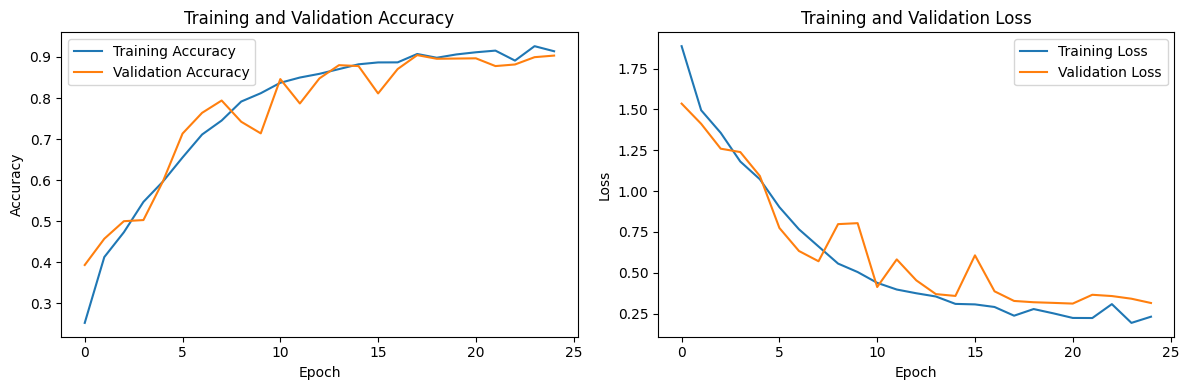

In [38]:
plt.figure(figsize=(12, 4))

# Plotting train vs validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plotting train vs validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 30ms/step


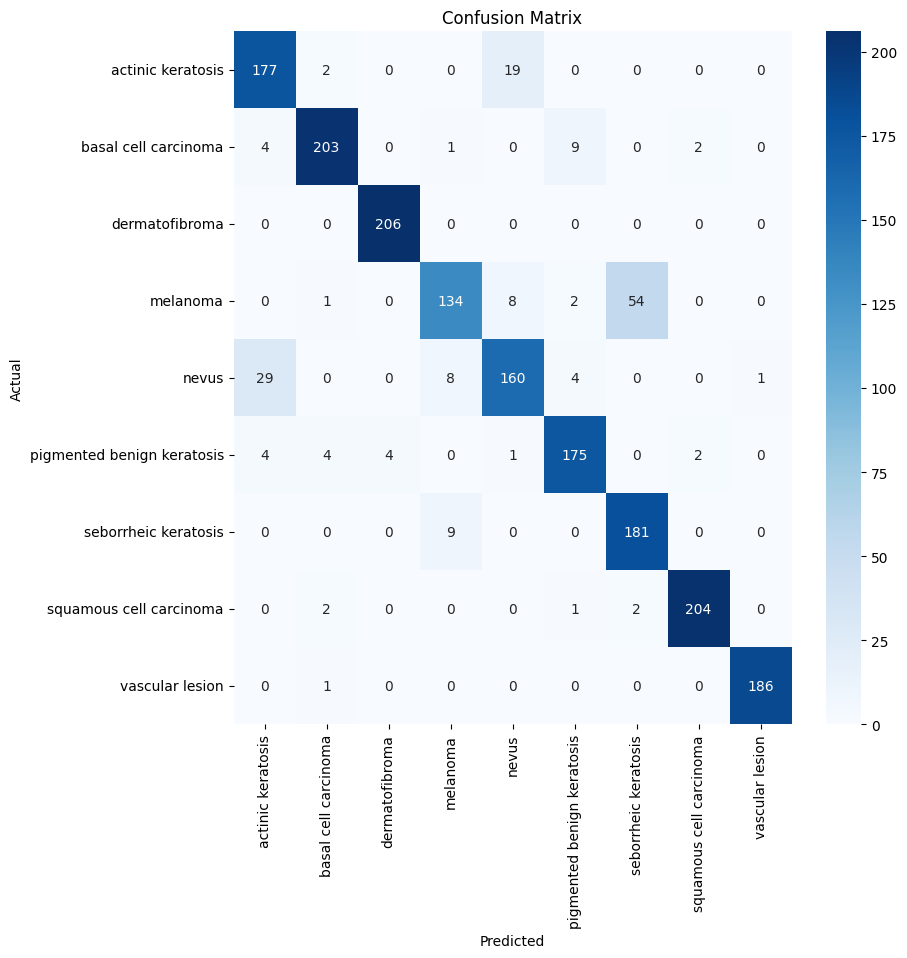

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to generate and plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(len(class_names), len(class_names)))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Get true labels and predicted labels for the validation dataset
y_true = []
y_pred = []

for images, labels in val_ds:
    y_true.extend(labels.numpy())
    predictions = model.predict(images)
    predicted_class_indices = np.argmax(predictions, axis=1)
    y_pred.extend(predicted_class_indices)

# Get class names from the training dataset
class_names = train_ds.class_names

# Plot the confusion matrix
plot_confusion_matrix(y_true, y_pred, class_names)
